In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)



UsageError: Line magic function `%matplotib` not found.


In [4]:
df1=pd.read_csv("C:/Users/Dell/Downloads/Bengaluru_House_Data.csv")

In [5]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

In [8]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2=df1.drop(['area_type','balcony','society','availability'],axis='columns')

In [9]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3=df2.dropna()

In [12]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [13]:
df3.shape

(13246, 5)

In [14]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3['bhk'] =df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Dell\AppData\Local\Temp\ipykernel_8\284898041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] =df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [17]:
len(df3['bhk'].unique())

19

In [18]:
len(df3[df3.bhk>20])

2

In [19]:
df3.total_sqft.unique()
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

is_float('678')

True

In [21]:
df3[~df3['total_sqft'].apply(is_float)]


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [22]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
convert_sqft_to_num('568.8')

568.8

AttributeError: 'float' object has no attribute 'split'

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,NaN,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,NaN,5.0,120.00,4
2,Uttarahalli,3 BHK,NaN,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,NaN,3.0,95.00,3
4,Kothanur,2 BHK,NaN,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,NaN,4.0,231.00,5
13316,Richards Town,4 BHK,NaN,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,NaN,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,NaN,4.0,488.00,4


In [24]:
df4=df3.copy()

In [25]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [26]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [27]:
df5=df4.copy()

In [28]:
df5['price_per_square_feet']=df5['price']*100000/df5['total_sqft']
df5

,location,size,total_sqft,bath,price,bhk,price_per_square_feet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [29]:
len(df5.location.unique())

1304

In [30]:
df5.location=df5.location.apply(lambda x:x.strip())

In [31]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [32]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [33]:
len(location_stats[location_stats<10])

1039

In [34]:
location_stats_lessthan_10=location_stats[location_stats<10]

In [35]:
location_stats_lessthan_10

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [36]:
len(df5.location.unique())

1293

In [37]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_lessthan_10 else x)


In [38]:
len(df5.location.unique())

255

In [39]:
df5[df5.total_sqft/df5.bhk<=300]

,location,size,total_sqft,bath,price,bhk,price_per_square_feet
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13300,Hosakerehalli,5 Bedroom,1500.0,6.0,145.0,5,9666.666667
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649
13306,other,4 Bedroom,1200.0,5.0,325.0,4,27083.333333


In [40]:
df5.shape

(13246, 7)

In [41]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [42]:
df6.shape

(12502, 7)

In [43]:
df6.price_per_square_feet.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_square_feet, dtype: float64

In [44]:
def remove_pps(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_square_feet)
        st=np.std(subdf.price_per_square_feet)
        reduced_df = subdf[(subdf.price_per_square_feet>(m-st))& (subdf.price_per_square_feet<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [45]:
df7=remove_pps(df6)
df7.shape

(10222, 7)

Text(0, 0.5, 'Count')

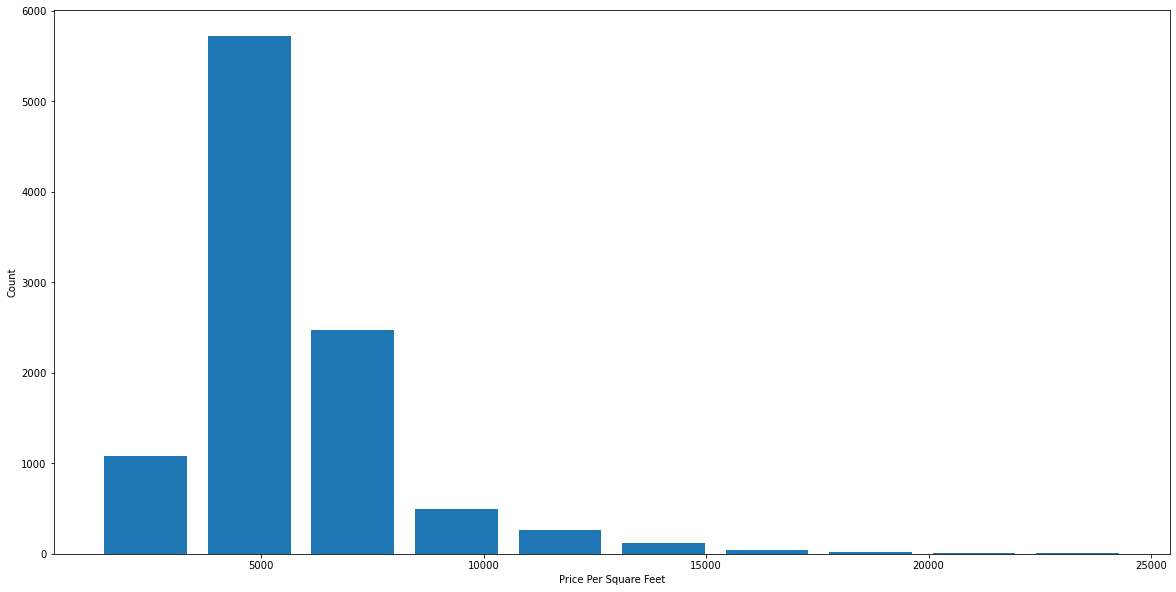

In [49]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.price_per_square_feet,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

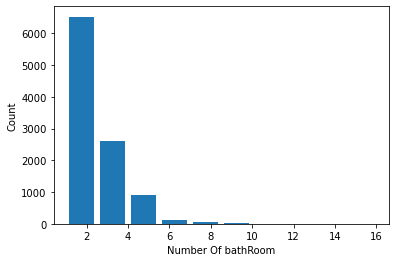

In [47]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number Of bathRoom")
plt.ylabel("Count")

In [48]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_square_feet
585,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1642,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5305,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6792,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8476,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [49]:
df8=df7[df7.bath<df7.bhk+2]

In [50]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_square_feet
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10217,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10218,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10219,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10220,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [51]:
df9=df8.drop(['price_per_square_feet','size'],axis='columns')

In [52]:
df9

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...
10217,other,1353.0,2.0,110.00,2
10218,other,812.0,1.0,26.00,1
10219,other,1440.0,2.0,63.93,3
10220,other,1075.0,2.0,48.00,2


In [53]:
len(df9['location'].unique())


255

In [54]:
len(df9['bhk'].unique())
df9.shape

(10128, 5)

In [55]:
dumies=pd.get_dummies(df9.location)

In [56]:
dumies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
import pandas as pd
df10=pd.concat([df9,dumies.drop('other',axis ='columns')],axis='columns')

In [62]:
df10

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,other,1353.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,other,812.0,1.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10219,other,1440.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,other,1075.0,2.0,48.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11=df10.drop('location',axis='columns')

In [73]:
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,1353.0,2.0,110.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,812.0,1.0,26.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10219,1440.0,2.0,63.93,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,1075.0,2.0,48.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df11.shape

(10128, 258)

In [60]:
X=df11.drop('price',axis='columns')

In [61]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10219,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,1075.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
Y=df11.price

In [63]:
Y

0        428.00
1        194.00
2        235.00
3        130.00
4        148.00
          ...  
10217    110.00
10218     26.00
10219     63.93
10220     48.00
10221    400.00
Name: price, Length: 10128, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [65]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.7963364547111098

ValueError: Unknown label type: 'continuous'

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)


array([0.84485981, 0.80415664, 0.80132165, 0.77377524, 0.76422636])

In [67]:
def predict_price(location,sqft,bath,bhk):
    
    

    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    
    return lr_clf.predict([x])[0]
    
    
    
    


In [107]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [68]:
a

NameError: name 'a' is not defined

[3 4 5]


In [69]:
predict_price('5th Block Hbr Layout',1000,3,4)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


16.04634891634769

In [70]:
predict_price('1st Phase JP Nagar',1000,3,4)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.59696230044898

In [71]:
import pickle
with open ('C:/Users/Dell/Downloads/Bengaluru_House_Data.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [72]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open ('columns.json','w') as f:
    f.write(json.dumps(columns))
